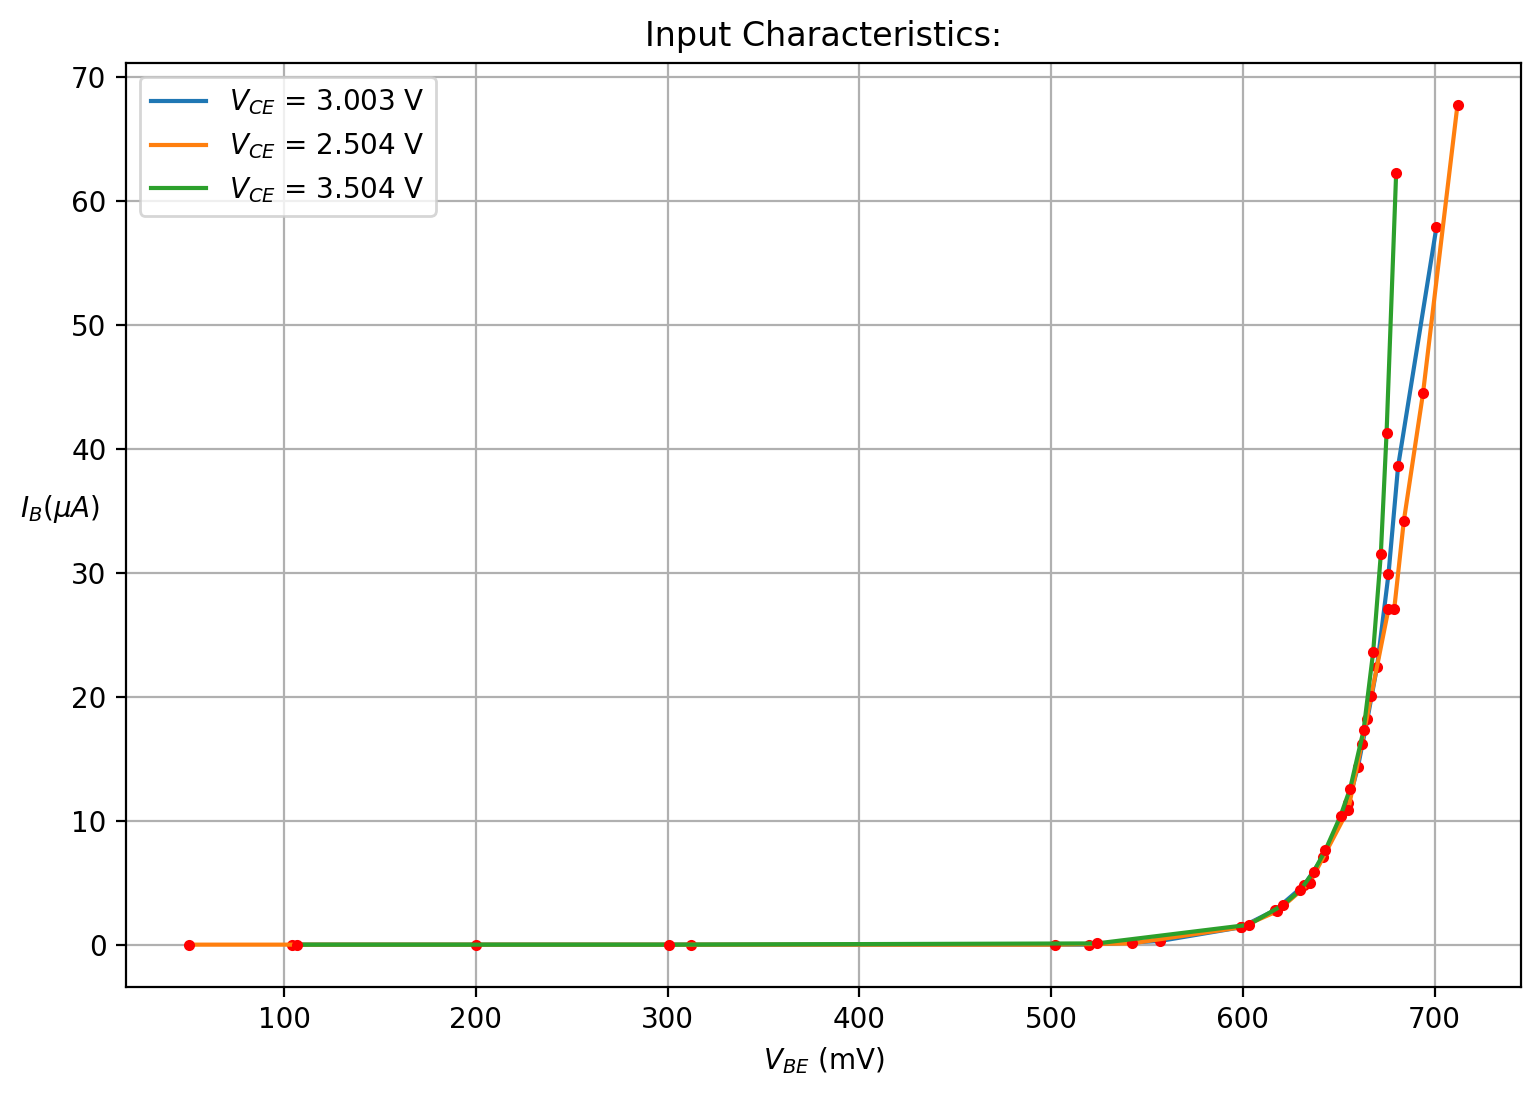

I/V(microA/milliV) = 0.001152714535901897 siemens
Input impedance = 867.5174718930638 ohms


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('input.csv')

input_cols = {('V_BE(2.504)','I_B(2.504)'), ('V_BE(3.003)','I_B(3.003)'),('V_BE(3.504)','I_B(3.504)')}
plt.figure(figsize=(9,6), dpi=200)
plt.grid()
plt.xlabel(r'$V_{BE}$ (mV)')
plt.ylabel(r'$I_B (\mu A)$', rotation=0)
plt.title('Input Characteristics')
for k, v in input_cols:
    input = np.vstack((
                    np.where(
                            np.isfinite(df[k]), 
                            df[k], 0
                            ), 
                    np.where(
                        np.isfinite(df[v]), df[v], 0
                            )
                    ))
    plt.plot(input[0], input[1],'-', label=r'$V_{CE}$ = ' + k[5:10] + ' V')
    plt.plot(input[0], input[1],'ro', markersize=3.0)
    
plt.legend()
a,b = np.polyfit(input[0][9:13] * 10**(-3), input[1][9:13] * 10**(-6), 1)
plt.savefig('input.jpeg', bbox_inches='tight')
plt.show()
print(f"I/V(microA/milliV) = {a} siemens")
print(f"Input impedance = {1/a} ohms")




Output impedance is 21.98132477385467 ohm


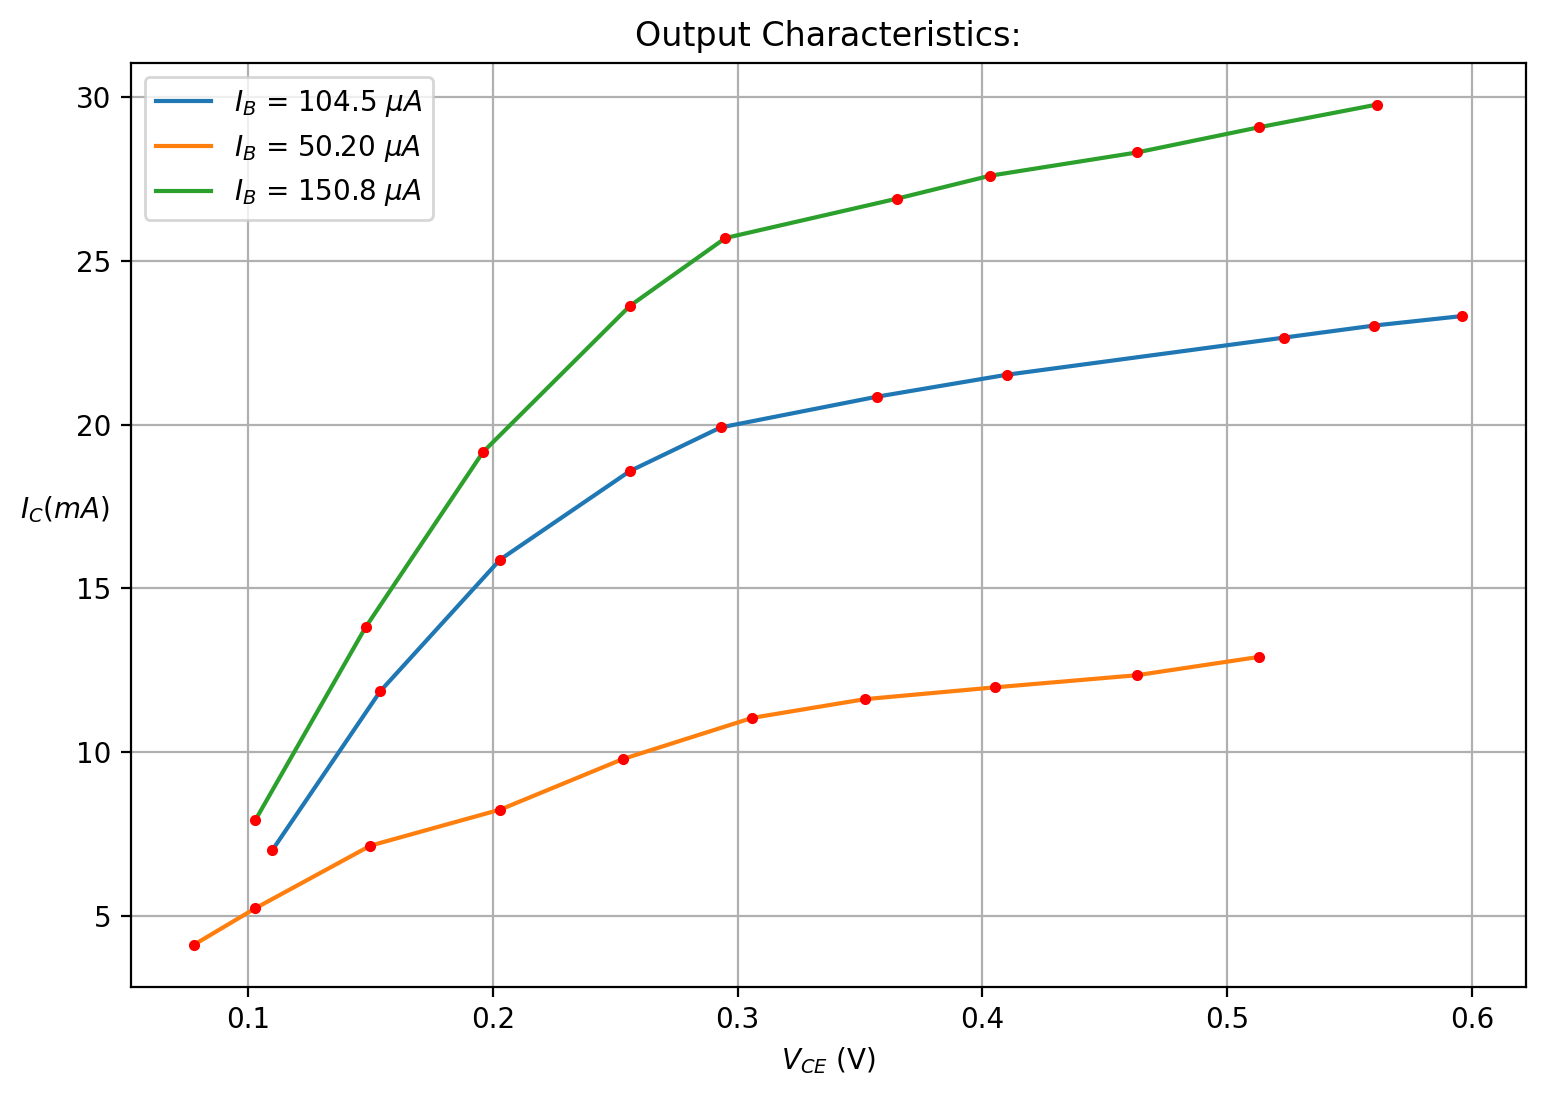

In [106]:
output_cols = {('V_CE(50.20)','I_C(50.20)'),('V_CE(104.5)','I_C(104.5)'),('V_CE(150.8)','I_C(150.8)')}
df = pd.read_csv('output.csv')
plt.figure(figsize=(9,6), dpi=200)
plt.grid()
plt.xlabel(r'$V_{CE}$ (V)')
plt.ylabel(r'$I_C (mA)$', rotation=0)
plt.title('Output Characteristics')
for k, v in output_cols:
    input = np.vstack((
                    np.where(
                            np.isfinite(df[k]), 
                            df[k], 0
                            ), 
                    np.where(
                        np.isfinite(df[v]), df[v], 0
                            )
                    ))
    plt.plot(input[0], input[1],'-', label=r'$I_B$ = ' + k[5:10] + r' $\mu A$')
    plt.plot(input[0], input[1],'ro', markersize=3.0)
    
plt.legend()
plt.savefig('output.jpeg', bbox_inches='tight')
a,b = np.polyfit(input[0][2:6], input[1][2:6] * 10**(-3), 1)
print(f"Output impedance is {1/a} ohm")
plt.show()


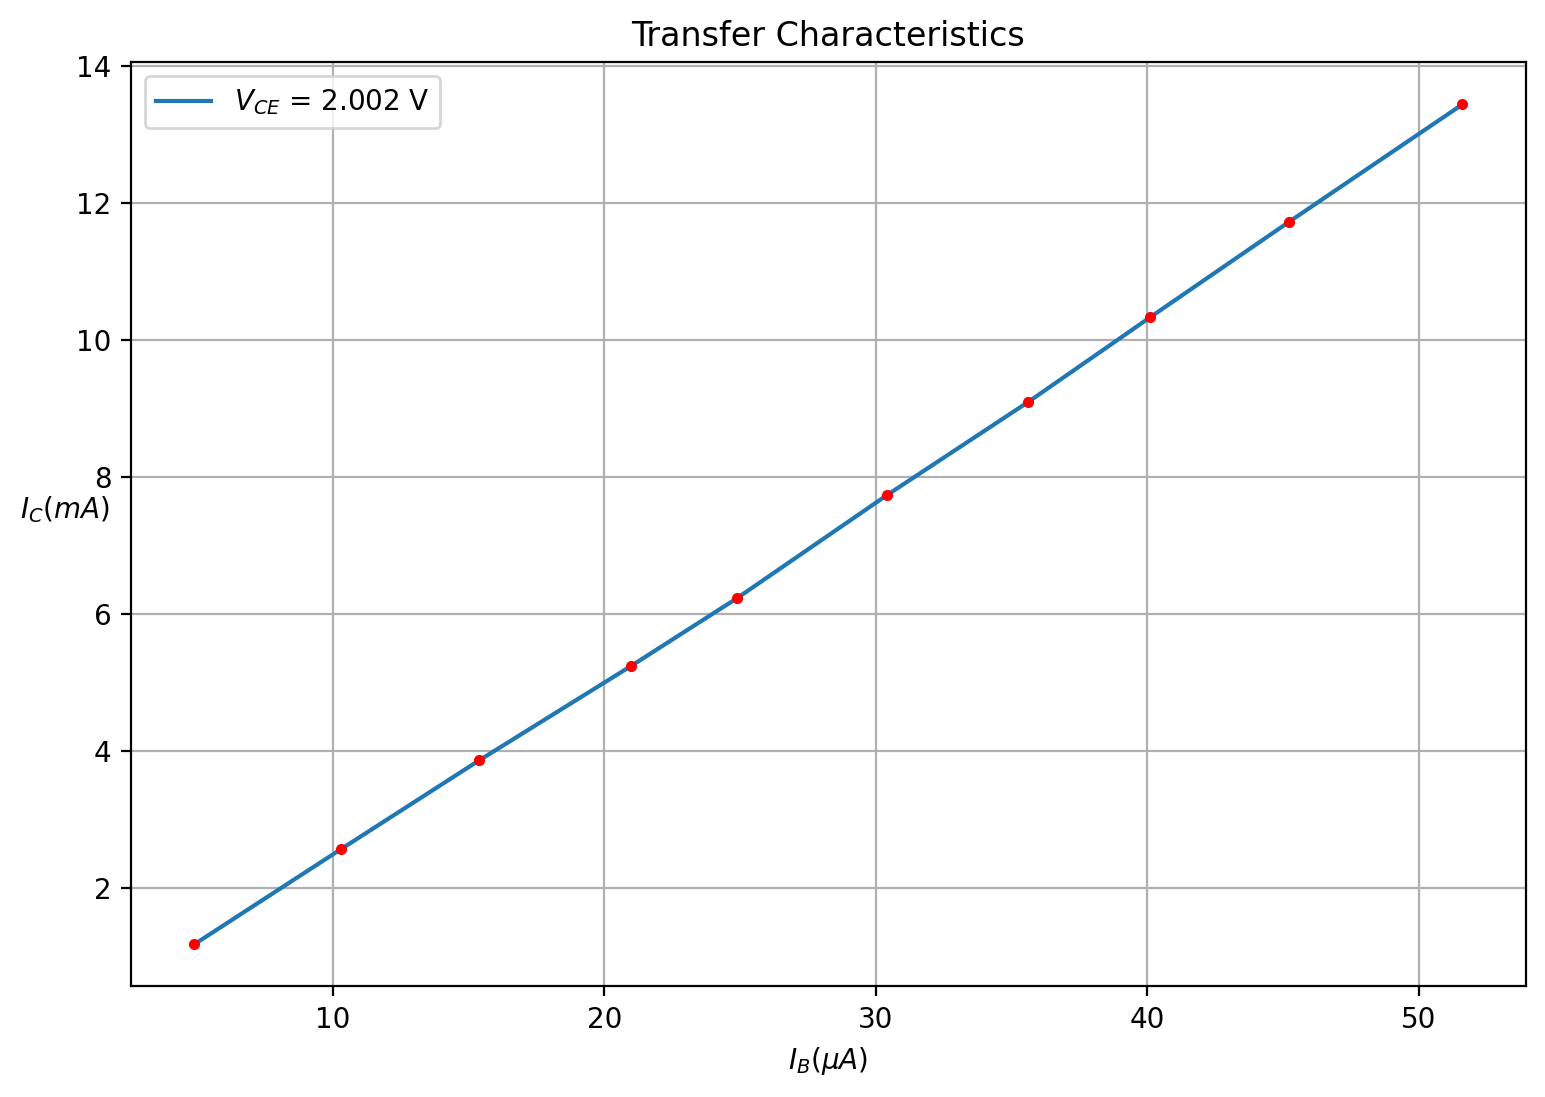

Beta equals 253.84615384615324


In [111]:
df = pd.read_csv('transfer.csv')
input = np.vstack((df['I_B'],
                    df['I_C']))
plt.figure(figsize=(9,6), dpi=200)
plt.grid()
plt.xlabel(r'$I_{B} (\mu A)$')
plt.ylabel(r'$I_C (mA)$', rotation=0)
plt.title('Transfer Characteristics')
plt.plot(input[0], input[1],'-', label=r'$V_{CE} $ = 2.002 V')
plt.plot(input[0], input[1],'ro', markersize=3.0)
plt.legend()
plt.savefig('transfer.jpeg', bbox_inches='tight')
plt.show()
a,b = np.polyfit(input[0][3:5] * 10**(-6), input[1][3:5] * 10**(-3), 1)
print(f"Beta equals {a}")
